# Kleiner Feldberg (Taunus, Germany) in a changing climate

[Kleiner Feldberg Taunus Observatory](https://www.uni-frankfurt.de/176187470.png?)
(source: https://www.goethe-university-frankfurt.de/176185298/Taunus_Observatory)

The Kleiner Feldberg is the second-highest mountain in the Taunus mountain 
range with an elevation of 826 m (2,710 ft), right next to largest montain 
called Großer Feldberg. 

On the top of the Kleiner Feldberg, there is the Taunus Observatory, which 
was build in 1913 and is still in use for meteorologocal and geophysical 
measurements. This station was selected because it is close to my home 
town of Frankfurt. Furthermore, I carried out measurements of various 
long-lived and short-lived halogenated substances at this station during 
my last job.


In [1]:
# import packages
import pandas as pd 
import numpy as np 
import holoviews as hv
import hvplot.pandas
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

### Climate Data

The data from the Kleiner Feldberg was taken from GHCN (Global Historical Climatology Network)-Daily database. This database contains obserbations of one or more of over 40 meteorological elements at morre and 90,000 stations worldwide.

Available data types for the station Kleiner Feldberg are daily maximum/minimum temperature, precipitation, and snow depth. For the present analysis, we have selected the daily maximum and minimum temperature. Data is available from early 1936 to March 2025. In order to analyze only full years, we have selected data up to and including 2024.

In [2]:
kl_feldberg_ncei_url = ('https://www.ncei.noaa.gov/access/services/data/v1'
                    '?dataset=daily-summaries&dataTypes=TMAX,TMIN&'
                    'stations=GME00124546&startDate=1936-01-01&'
                    'endDate=2024-12-31&units=standard')
kl_feldberg_ncei_url

'https://www.ncei.noaa.gov/access/services/data/v1?dataset=daily-summaries&dataTypes=TMAX,TMIN&stations=GME00124546&startDate=1936-01-01&endDate=2024-12-31&units=standard'

### Data Download

In [3]:
# Download the climate data
kl_feldberg_climate_df = pd.read_csv(
    kl_feldberg_ncei_url,
    index_col='DATE',
    parse_dates=True,
    na_values=['NaN']
)

# rename temperature column from TMAX and TMIN 
# to MAX_TEMP_F and MIN_TEMP_F (temperatures in Fahrenheit)
kl_feldberg_climate_units_df = kl_feldberg_climate_df.rename(columns={
    'TMAX': 'MAX_TEMP_F',  
    'TMIN': 'MIN_TEMP_F',                                                     
})

# quick look into the first five rows of the DataFrame
kl_feldberg_climate_units_df.head()

,STATION,MAX_TEMP_F,MIN_TEMP_F
DATE,,,
1936-01-01,GME00124546,41.0,35.0
1936-01-02,GME00124546,36.0,34.0
1936-01-03,GME00124546,41.0,33.0
1936-01-04,GME00124546,39.0,31.0
1936-01-05,GME00124546,35.0,29.0


### Conversion Fahrenheit to Celcius 

The standard unit when loading the dada is Fahrenheit. Optional, the 
data can be converted to Celcius, one of the two temperature scales used
in the <a href="https://en.wikipedia.org/wiki/International_System_of_Units" 
target="_blank">International System of Units (SI)</a>.

<Axes: xlabel='DATE'>

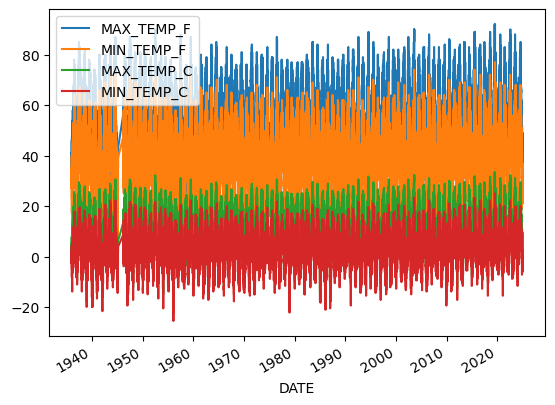

In [4]:
# Convert units with a function
def Fahrenheit_to_Celcius(temperature_F: float):
    """Convert Fahrenheit temperature to Celcius

    :param temperature_F (float): Temperature in Fahrenheit
    """
    return (temperature_F-32) * 5/9 

# execute function
kl_feldberg_climate_units_df['MAX_TEMP_C'] = (
    kl_feldberg_climate_units_df['MAX_TEMP_F'].apply(Fahrenheit_to_Celcius))
kl_feldberg_climate_units_df['MIN_TEMP_C'] = (
    kl_feldberg_climate_units_df['MIN_TEMP_F'].apply(Fahrenheit_to_Celcius))


# display maximum and minimum temperature in Fahrenheit and Celcius
kl_feldberg_climate_units_df.plot()

### Analysis

To learn more about the climate at Kleiner Feldberg and whether it has 
changed over the period of the records, we perform Linear Ordinary Least 
Squares (OLS) Regressions on annual averages daily maximum and minimum 
temperatures. This provides us with information not only about whether 
there is a general trend, but also whether this trend is the same for 
the daily maximum and minimum temperatures.

In [5]:
# the analysis will use Celcius data only 
# the station name and the temperatures in Fahrenheit are not further needed
kl_feldberg_climate_units_df = kl_feldberg_climate_units_df[["MAX_TEMP_C", 
                                                             "MIN_TEMP_C"]]
kl_feldberg_climate_units_df

,MAX_TEMP_C,MIN_TEMP_C
DATE,,
1936-01-01,5.000000,1.666667
1936-01-02,2.222222,1.111111
1936-01-03,5.000000,0.555556
1936-01-04,3.888889,-0.555556
1936-01-05,1.666667,-1.666667
...,...,...
2024-12-27,7.222222,2.222222
2024-12-28,9.444444,2.222222
2024-12-29,2.222222,-5.555556


In [6]:
# Resample data to obtain the mean annual temperature.
ann_kl_feldberg_climate_units_df = kl_feldberg_climate_units_df.resample('YS').mean()
ann_kl_feldberg_climate_units_df.head()

,MAX_TEMP_C,MIN_TEMP_C
DATE,,
1936-01-01,8.861566,3.161809
1937-01-01,9.223744,3.423135
1938-01-01,9.229833,3.237443
1939-01-01,8.423135,2.989346
1940-01-01,7.644202,1.728901


In [7]:
# Plot the annual data interactively
ann_kl_feldberg_plt = ann_kl_feldberg_climate_units_df.hvplot(y=['MAX_TEMP_C','MIN_TEMP_C'],
    title='Observed Mean Annual Temperature of Kleiner Feldberg [°C]',
    xlabel='Year',
    ylabel='Mean Annual Temperature [°C]'
    )

ann_kl_feldberg_plt

:NdOverlay   [Variable]
   :Curve   [DATE]   (value)

From the interactive plot, we see that the variation in temperatures 
(random error) behaves almost the same over time. Only one year shows 
very low values in both, annual maximum and minimum temperature (1945). 
A larger data gap is visible as well in the plot showing the daily 
temperatures. To examine this more closely, let us display the number of 
rows (days) for each year, focusing on the years 1944 to 1946.

In [8]:
# Using size() to count all rows per year
values_per_year = kl_feldberg_climate_units_df.groupby(kl_feldberg_climate_units_df.index.year).size()
print("Nr. of obs. in 1944",  values_per_year[1944])
print("Nr. of obs. in 1945",  values_per_year[1945])
print("Nr. of obs. in 1946",  values_per_year[1946])

Nr. of obs. in 1944 366
Nr. of obs. in 1945 59
Nr. of obs. in 1946 275


The year 1945 has significantly fewer observation days, covering only 
about 16% of the year. In 1946, about 75% of the year is covered. 
Since 1945 in particular cannot represent the annual average, 
we will not consider this year for the trend analysis. 


In [ ]:
# set annual minimum and maximum temperature of 1945 to numpy nan value
ann_kl_feldberg_climate_units_df.loc['1945-01-01','MAX_TEMP_C'] = np.nan
ann_kl_feldberg_climate_units_df.loc['1945-01-01','MIN_TEMP_C'] = np.nan

# Plot the annual data interactively (again)
ann_kl_feldberg_plt = ann_kl_feldberg_climate_units_df.hvplot(y=['MAX_TEMP_C','MIN_TEMP_C'],
    title='Observed Mean Annual Temperature of Kleiner Feldberg [°C]',
    xlabel='Year',
    ylabel='Mean Annual Temperature [°C]'
    )

ann_kl_feldberg_plt


:NdOverlay   [Variable]
   :Curve   [DATE]   (value)

### Determination of the trend lines

Slope for max temp.: 0.02207574852581519 degrees per year
Slope for min temp.: 0.018430023355391855 degrees per year


Text(0.5, 1.0, 'Mean annual min. and max. temperatures - Kleiner Feldberg, Germany')

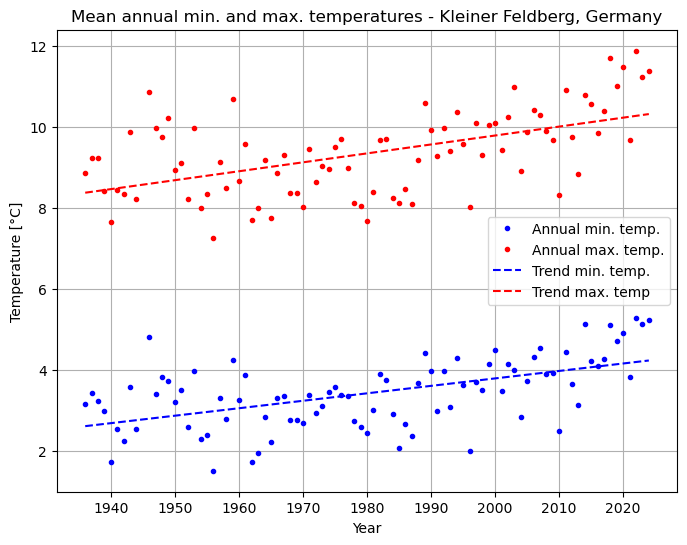

In [24]:
# Fit an OLS Linear Regression to the data
# get a copy of the original data for the fit

kl_feldberg_trend = ann_kl_feldberg_climate_units_df.copy()

# Index to time "number" column
kl_feldberg_trend["TIME"] = np.arange(len(kl_feldberg_trend.index))

# Drop rows with any NaN value
kl_feldberg_trend_cleaned = kl_feldberg_trend.dropna()

# Fit data
X = kl_feldberg_trend_cleaned.loc[:, ['TIME']]
y_min = kl_feldberg_trend_cleaned.loc[:, 'MIN_TEMP_C']
y_max = kl_feldberg_trend_cleaned.loc[:, 'MAX_TEMP_C']

# separate model for minimum and maximum temperatrure
model_min = LinearRegression()
model_min.fit(X, y_min)

model_max = LinearRegression()
model_max.fit(X, y_max)

# calculate/predict trend line from LinearRegression model
y_pred_min = pd.Series(model_min.predict(X), index=X.index)
y_pred_min

y_pred_max = pd.Series(model_max.predict(X), index=X.index)
y_pred_max

# calculate and print metrics
print(f'Slope for max temp.: {model_max.coef_[0]} degrees per year')
print(f'Slope for min temp.: {model_min.coef_[0]} degrees per year')

# Plot results
fig, ax = plt.subplots(figsize=(8, 6), dpi=100)

# the annual min and max temperature values
ax.plot(kl_feldberg_trend_cleaned.index, 
        kl_feldberg_trend_cleaned["MIN_TEMP_C"], 
        ".", 
        color="blue",
        label='Annual min. temp.')
ax.plot(kl_feldberg_trend_cleaned.index, 
        kl_feldberg_trend_cleaned["MAX_TEMP_C"], 
        ".", 
        color="red",
        label='Annual max. temp.')
# the trend line
ax.plot(y_pred_min.index, y_pred_min, "--", color="blue", 
        label='Trend min. temp.')
ax.plot(y_pred_max.index, y_pred_max, "--", color="red", 
        label='Trend max. temp')

ax.set_xlabel("Year")
ax.set_ylabel("Temperature [°C]")
ax.grid()

ax.legend()
ax.set_title('Mean annual min. and max. temperatures - Kleiner Feldberg, Germany')